### Exploatory Data Analysis Questions - EDA

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style("darkgrid")

### Answer EDA Questions

In [47]:
df = pd.read_csv("CarPrice_Assignment.csv")
df.head(3)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0


In [48]:
df.isnull().any()
df.shape

(205, 26)

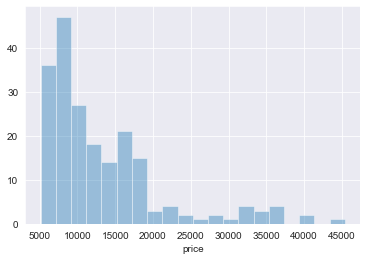

In [49]:
# 1 - Car prices are around how many dollars?
sns.distplot(df.price, bins=20, kde=False)
# Answer: Most cars are around 7k to 8k dollars

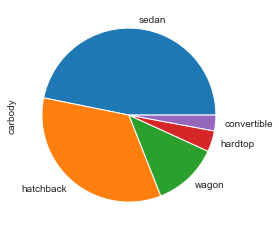

In [50]:
# 2 - What kind of car appears most in the dataset?
df.carbody.value_counts().plot(kind="pie")
# It is sedan

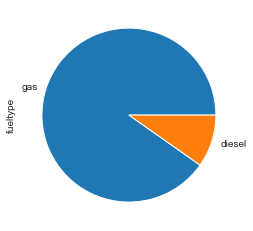

In [51]:
# 3 - What type of fuel is most used?
df.fueltype.value_counts().plot(kind="pie")
# gas it still the most used one.

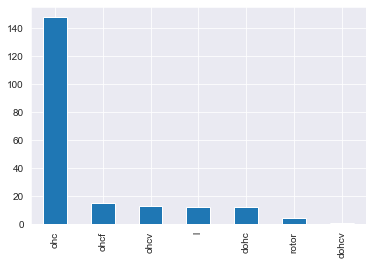

In [52]:
# 4 - What are the most common engine power?
df.enginetype.value_counts().plot(kind="bar")
# ohc

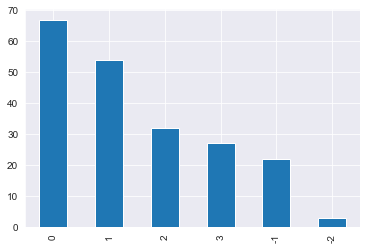

In [53]:
# 5 - What is the most common insurance risk classification?
df.symboling.value_counts().plot(kind="bar")
# The Zero One

### Multiple Linear Regression Algorithmn

In [54]:
#### with the heatmap, we can easily identify what variables ahve positive/negative correlations with the car pricing.

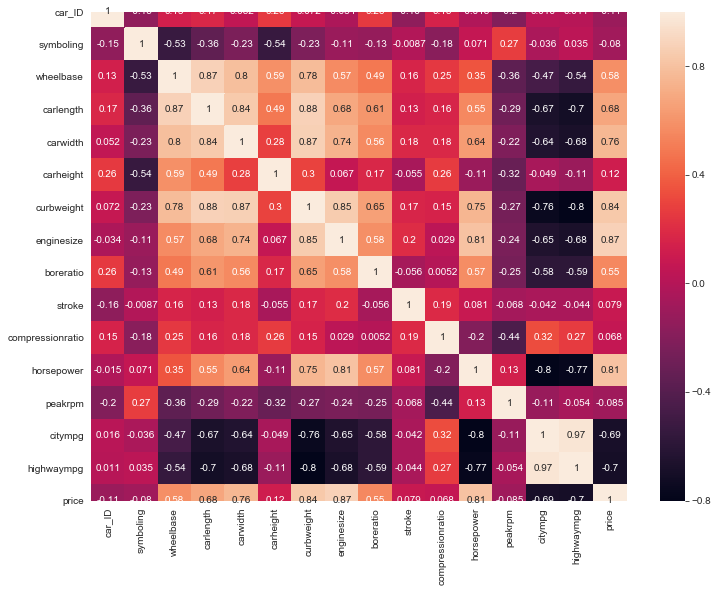

In [55]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(), annot=True)

#### Significant Variables - Numerical

In [56]:
# picking up all the numerical variables
num_variables = df[["car_ID", "doornumber", "cylindernumber", "symboling", "wheelbase", "carlength", "carwidth", "carheight", "curbweight", "boreratio", "enginesize", "stroke", "compressionratio", "horsepower", "peakrpm", "citympg", "highwaympg", "price"]]
num_variables.head()

,car_ID,doornumber,cylindernumber,symboling,wheelbase,carlength,carwidth,carheight,curbweight,boreratio,enginesize,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,two,four,3,88.6,168.8,64.1,48.8,2548,3.47,130,2.68,9.0,111,5000,21,27,13495.0
1,2,two,four,3,88.6,168.8,64.1,48.8,2548,3.47,130,2.68,9.0,111,5000,21,27,16500.0
2,3,two,six,1,94.5,171.2,65.5,52.4,2823,2.68,152,3.47,9.0,154,5000,19,26,16500.0
3,4,four,four,2,99.8,176.6,66.2,54.3,2337,3.19,109,3.40,10.0,102,5500,24,30,13950.0
4,5,four,five,2,99.4,176.6,66.4,54.3,2824,3.19,136,3.40,8.0,115,5500,18,22,17450.0


In [57]:
# Transfrom string numbers into real numbers
num_variables.doornumber.value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [58]:
num_variables.cylindernumber.value_counts()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64

In [59]:
# Replace doornumber col into real digits
num_variables.doornumber.replace({"two": 2, "four": 4}, inplace=True)
num_variables.head()

C:\Users\wenhsian\Documents\Temp\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,car_ID,doornumber,cylindernumber,symboling,wheelbase,carlength,carwidth,carheight,curbweight,boreratio,enginesize,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,2,four,3,88.6,168.8,64.1,48.8,2548,3.47,130,2.68,9.0,111,5000,21,27,13495.0
1,2,2,four,3,88.6,168.8,64.1,48.8,2548,3.47,130,2.68,9.0,111,5000,21,27,16500.0
2,3,2,six,1,94.5,171.2,65.5,52.4,2823,2.68,152,3.47,9.0,154,5000,19,26,16500.0
3,4,4,four,2,99.8,176.6,66.2,54.3,2337,3.19,109,3.40,10.0,102,5500,24,30,13950.0
4,5,4,five,2,99.4,176.6,66.4,54.3,2824,3.19,136,3.40,8.0,115,5500,18,22,17450.0


In [60]:
num_variables.cylindernumber.replace({"two": 2, "four": 4, "six" : 6, "five":5, "eight":8, "twelve":12, "three":3}, inplace=True)
num_variables.head()

,car_ID,doornumber,cylindernumber,symboling,wheelbase,carlength,carwidth,carheight,curbweight,boreratio,enginesize,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,2,4,3,88.6,168.8,64.1,48.8,2548,3.47,130,2.68,9.0,111,5000,21,27,13495.0
1,2,2,4,3,88.6,168.8,64.1,48.8,2548,3.47,130,2.68,9.0,111,5000,21,27,16500.0
2,3,2,6,1,94.5,171.2,65.5,52.4,2823,2.68,152,3.47,9.0,154,5000,19,26,16500.0
3,4,4,4,2,99.8,176.6,66.2,54.3,2337,3.19,109,3.40,10.0,102,5500,24,30,13950.0
4,5,4,5,2,99.4,176.6,66.4,54.3,2824,3.19,136,3.40,8.0,115,5500,18,22,17450.0


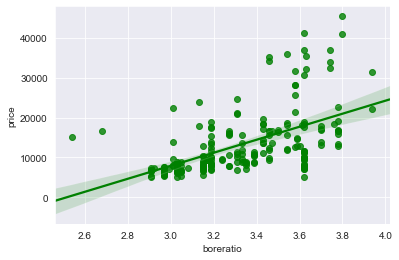

In [61]:
# boreratio looks like have a positive relationship
sns.regplot(x="boreratio", y="price", data=num_variables, color="green")

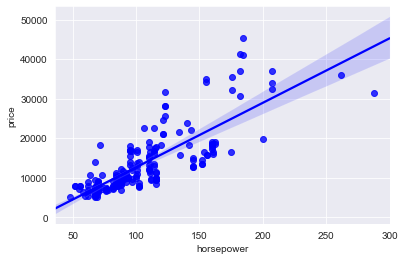

In [62]:
# plot relationship graph between car ID and price, looks like this should be dropped
sns.regplot(x="horsepower", y="price", data=num_variables, color="blue")

In [63]:
num_variables = num_variables.drop(["car_ID"], axis=1)
num_variables.head()
# did a graph plotting operations and confirming relationships

,doornumber,cylindernumber,symboling,wheelbase,carlength,carwidth,carheight,curbweight,boreratio,enginesize,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,2,4,3,88.6,168.8,64.1,48.8,2548,3.47,130,2.68,9.0,111,5000,21,27,13495.0
1,2,4,3,88.6,168.8,64.1,48.8,2548,3.47,130,2.68,9.0,111,5000,21,27,16500.0
2,2,6,1,94.5,171.2,65.5,52.4,2823,2.68,152,3.47,9.0,154,5000,19,26,16500.0
3,4,4,2,99.8,176.6,66.2,54.3,2337,3.19,109,3.40,10.0,102,5500,24,30,13950.0
4,4,5,2,99.4,176.6,66.4,54.3,2824,3.19,136,3.40,8.0,115,5500,18,22,17450.0


In [64]:
# To Extract Brand of a Car
def get_car_brand(arg):
    return arg.split(" ")[0]

In [65]:
# filtering out all the categorical data
category_variables_df = df.drop(["car_ID", "symboling", "wheelbase", "carlength", "carwidth", "carheight", "curbweight", "boreratio", "doornumber", "cylindernumber", "enginesize", "stroke", "compressionratio", "horsepower", "peakrpm", "citympg", "highwaympg"], axis=1)
df1_with_brand = category_variables_df # one df with brand name
df1_with_CarName = category_variables_df # one df with car name

In [66]:
df1_with_brand
df1_with_brand["brand"] = df1_with_brand["CarName"].apply(lambda x: get_car_brand(x))
df1_with_brand = df1_with_brand[["brand", "fueltype", "aspiration", "carbody", "drivewheel", "enginelocation", "enginetype", "fuelsystem"]]
df1_with_brand.head()

,brand,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem
0,alfa-romero,gas,std,convertible,rwd,front,dohc,mpfi
1,alfa-romero,gas,std,convertible,rwd,front,dohc,mpfi
2,alfa-romero,gas,std,hatchback,rwd,front,ohcv,mpfi
3,audi,gas,std,sedan,fwd,front,ohc,mpfi
4,audi,gas,std,sedan,4wd,front,ohc,mpfi


In [67]:
df1_with_CarName = df1_with_CarName.drop(["brand", "price"], axis=1)
df1_with_CarName.head()

,CarName,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem
0,alfa-romero giulia,gas,std,convertible,rwd,front,dohc,mpfi
1,alfa-romero stelvio,gas,std,convertible,rwd,front,dohc,mpfi
2,alfa-romero Quadrifoglio,gas,std,hatchback,rwd,front,ohcv,mpfi
3,audi 100 ls,gas,std,sedan,fwd,front,ohc,mpfi
4,audi 100ls,gas,std,sedan,4wd,front,ohc,mpfi


In [68]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

for col in df1_with_brand.columns:
    df1_with_brand[col] = label.fit_transform(df1_with_brand[col])
df1_with_brand.head()

C:\Users\wenhsian\Documents\Temp\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,brand,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem
0,1,1,0,0,2,0,0,5
1,1,1,0,0,2,0,0,5
2,1,1,0,2,2,0,5,5
3,2,1,0,3,1,0,3,5
4,2,1,0,3,0,0,3,5


In [69]:
for col in df1_with_CarName.columns:
    df1_with_CarName[col] = label.fit_transform(df1_with_CarName[col])
df1_with_CarName.head()

,CarName,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem
0,2,1,0,0,2,0,0,5
1,3,1,0,0,2,0,0,5
2,1,1,0,2,2,0,5,5
3,4,1,0,3,1,0,3,5
4,5,1,0,3,0,0,3,5


In [70]:
df1_with_brand.shape

(205, 8)

In [71]:
df1_with_CarName.shape

(205, 8)

In [72]:
# Full Dataset with Car Name
data1 = pd.concat([num_variables, df1_with_CarName], axis=1)
data1.head()

,doornumber,cylindernumber,symboling,wheelbase,carlength,carwidth,carheight,curbweight,boreratio,enginesize,...,highwaympg,price,CarName,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem
0,2,4,3,88.6,168.8,64.1,48.8,2548,3.47,130,...,27,13495.0,2,1,0,0,2,0,0,5
1,2,4,3,88.6,168.8,64.1,48.8,2548,3.47,130,...,27,16500.0,3,1,0,0,2,0,0,5
2,2,6,1,94.5,171.2,65.5,52.4,2823,2.68,152,...,26,16500.0,1,1,0,2,2,0,5,5
3,4,4,2,99.8,176.6,66.2,54.3,2337,3.19,109,...,30,13950.0,4,1,0,3,1,0,3,5
4,4,5,2,99.4,176.6,66.4,54.3,2824,3.19,136,...,22,17450.0,5,1,0,3,0,0,3,5


In [73]:
X = data1.iloc[:, :].drop(["price"], axis=1).values
Y = data1.loc[:, ["price"]].values

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
y_pred = regressor.predict(x_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8121355734171611

In [79]:
pred = pd.DataFrame(y_test)
pred["pred_price"] = y_pred
pred.columns = [["real_price", "pred_price"]]
pred.head()

,real_price,pred_price
0,6795.0,6040.092711
1,15750.0,16742.303222
2,15250.0,14041.326095
3,5151.0,1673.016902
4,9995.0,9819.526791


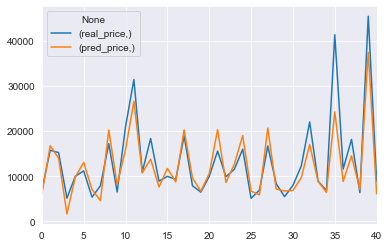

In [80]:
pred.plot()